## **Naive Bayes**

In [17]:
#Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [18]:
# Loading the dataset
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**Data Preprocessing**
1. Drop Irrelevant Features:<br>
In the dataset, we can notice that "ID" and "ZIP Code" are not required fo rthe prediction, so we can deop them.<br>

2. Fixing negative values from "Experience" feature

3. Selecting Continuous features:<br>

In [19]:
# Dropping irrelevant columns from the dataset
df = df.drop(['ID', 'ZIP Code'], axis=1)
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [39]:
# "Experience" column has negative valuesm which are invalid
# Replacing them with 0 since experience cannot be negative years.
df['Experience'] = df['Experience'].apply(lambda x: max(x, 0))

In [40]:
# Seperating Features into X and y

#Selecting continuous features which are suitable for the model
features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
X = df[features].values
y = df['Personal Loan'].values

In [41]:
print(X)

[[25.   1.  49.   1.6  0. ]
 [45.  19.  34.   1.5  0. ]
 [39.  15.  11.   1.   0. ]
 ...
 [63.  39.  24.   0.3  0. ]
 [65.  40.  49.   0.5  0. ]
 [28.   4.  83.   0.8  0. ]]


In [42]:
print(y)

[0 0 0 ... 0 0 0]


**Train-Test Split**<br>
Splitting the data into train and test data.
Training data (80%) and testing data(20%), and random_state=42 for reproducability

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Standardize Features**<br>
Standardizing features with mean =0 and std, deviation=1, making features suitable for Gaussian Naive Bayes

In [25]:
# Standardize features (mean=0, std devation=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Gaussian Naive Bayes Classifier**

In [27]:
# Gaussian Naive Classifier
class NaiveBayes:
  def __init__(self):
        self.classes = None # to store the classes(0 and 1)
        self.mean = None # to store the mean for every feature
        self.var = None # to store the variance of individual features
        self.priors = None # to store the prior proabability fo the features
  # Model fitting on the training data
  def fit(self, X, y):
        self.classes = np.unique(y) # to find out the unique classes(here, 0 and 1)
        n_features = X.shape[1]   # number of features
        n_classes = len(self.classes) # no of unique classes

        # Calculating Mean, Variance and Prioiri Probabilities for each class
        self.mean = np.zeros((n_classes, n_features)) # inititalizing Mean matrix
        self.var = np.zeros((n_classes, n_features))  #insitializing variance matrix
        self.priors = np.zeros(n_classes)     # Initialize Priroi array

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[idx, :] = X_c.mean(axis=0) # calculating mean for each feature
            self.var[idx, :] = X_c.var(axis=0) + 1e-9  # calculating variance and adding small value to avoid zero division
            self.priors[idx] = X_c.shape[0] / X.shape[0] # calculatin g prior robabability for the class

  # Predicting the test dataset
  def predict(self, X):
        y_pred = [self._predict(x) for x in X] # predicting probability for each point in the test dataset
        return np.array(y_pred)  # returning array of predcitions

  def _predict(self, x):
        posteriors = [] # storing proterior probability for each class
        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])  # log of proteriror probabiblity
            posterior = np.sum(np.log(self._pdf(idx, x)))  # log of likelihood
            posterior = prior + posterior
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

  # Gaussian probability density function for each feature
  def _pdf(self, class_idx, x):
        mean = self.mean[class_idx]  # calcualting mean for class
        var = self.var[class_idx]    # calculating variance for class
        return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-((x - mean) ** 2) / (2 * var))


**Model Training**

In [28]:
# Train Model
nb = NaiveBayes()
nb.fit(X_train, y_train)

In [29]:
# Predict and Evaluate
y_pred = nb.predict(X_test)

In [43]:
# Calculate metrics for model performance
accuracy = accuracy_score(y_test, y_pred)   # tells you how many predictions are right
precision = precision_score(y_test, y_pred, average='binary') # positiv epredictions for the right predictions
recall = recall_score(y_test, y_pred, average='binary')   #the cases got captured for positive class
f1 = f1_score(y_test, y_pred, average='binary')


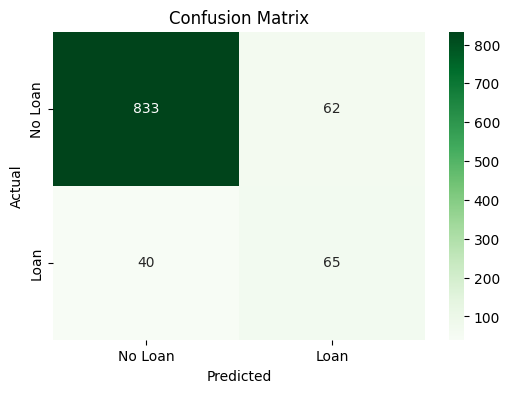

In [34]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No Loan', 'Loan'], yticklabels=['No Loan', 'Loan'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

True Negatives (TN) = 833
→ The model correctly predicted “No Loan” when it was actually “No Loan”

False Positives (FP) = 62
→ The model predicted “Loan” but it was actually “No Loan” (Type I error)

False Negatives (FN) = 40
→ The model predicted “No Loan” but it was actually “Loan” (Type II error)

True Positives (TP) = 65
→ The model correctly predicted “Loan” when it was actually “Loan”

In [44]:
# Printing the Performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8980
Precision: 0.5118
Recall: 0.6190
F1-score: 0.5603


**VIsualization**<br>
1. Confusion Matrix: <br>
It shows true and predicted labels in the form of a heatmap

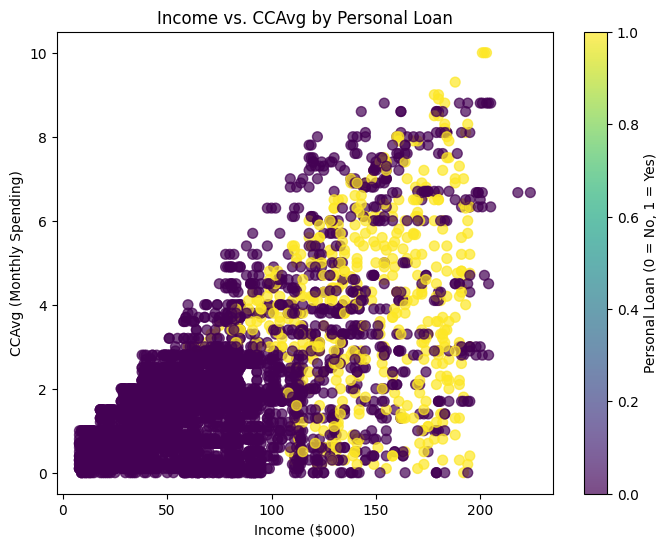

In [35]:
# Feature distribution plot (Income vs. CCAvg)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 2], X[:, 3], c=y, cmap='viridis', s=50, alpha=0.7)
plt.xlabel('Income ($000)')
plt.ylabel('CCAvg (Monthly Spending)')
plt.title('Income vs. CCAvg by Personal Loan')
plt.colorbar(label='Personal Loan (0 = No, 1 = Yes)')
plt.show()

Observation:

1. 0 (Purple) = No Personal Loan
   1 (Yellow) = Took a Personal Loan
2. Loan takers (yellow dots) are generally:
Higher income (often above $100k)
Higher monthly credit card spend.
